# Zalora Price Optimization
Product Pricing Model
___

Outline:
- Load Data
- Analysis
- Modeling
- Optimization

In [1]:
# Data Preprocessing
import pandas as pd
import numpy as np

# Modeling
import statsmodels.formula.api as sm

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data for Training Model

In [2]:
data_zalora = pd.read_csv("zalora.csv")
data_zalora.head()

,SKU,Color,Week_of_Year,Brand_Name,Units_Sold,Unit_Price,Web_SKU_Clicks,Web_SKU_Impressions,Item_Cost,Price_Band,Weeks_Since_Release,Stock
0,00075ZZA9550E1GS,Black,36,ZALORA,6,39.9,1121,37237,15.48,4,1,60
1,00075ZZA9550E1GS,Black,38,ZALORA,2,39.9,1215,23405,15.48,4,3,54
2,00075ZZA9550E1GS,Black,39,ZALORA,3,39.9,1112,19632,15.48,4,4,52
3,00075ZZA9550E1GS,Black,43,ZALORA,3,29.9,2336,43152,15.48,4,8,49
4,00075ZZA9550E1GS,Black,49,ZALORA,17,19.9,190,4196,15.48,4,14,46


1. Check Missing Value

In [3]:
data_zalora.isnull().sum()

SKU                    0
Color                  0
Week_of_Year           0
Brand_Name             0
Units_Sold             0
Unit_Price             0
Web_SKU_Clicks         0
Web_SKU_Impressions    0
Item_Cost              0
Price_Band             0
Weeks_Since_Release    0
Stock                  0
dtype: int64

We have no missing value

2. Check Data Type

In [4]:
data_zalora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SKU                  3847 non-null   object 
 1   Color                3847 non-null   object 
 2   Week_of_Year         3847 non-null   int64  
 3   Brand_Name           3847 non-null   object 
 4   Units_Sold           3847 non-null   int64  
 5   Unit_Price           3847 non-null   float64
 6   Web_SKU_Clicks       3847 non-null   int64  
 7   Web_SKU_Impressions  3847 non-null   int64  
 8   Item_Cost            3847 non-null   float64
 9   Price_Band           3847 non-null   int64  
 10  Weeks_Since_Release  3847 non-null   int64  
 11  Stock                3847 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 360.8+ KB


The data types are fine, except two variables:
- The price band should be treat as categorical form, since it's a category of price that have an order (ordinal)
- The week of year should be category

In [5]:
# Change Week_of_Year into a category
data_zalora["Week_of_Year"] = pd.Categorical(data_zalora["Week_of_Year"])

# Change Price_Band into a category
data_zalora["Price_Band"] = pd.Categorical(data_zalora["Price_Band"])

## Visualization

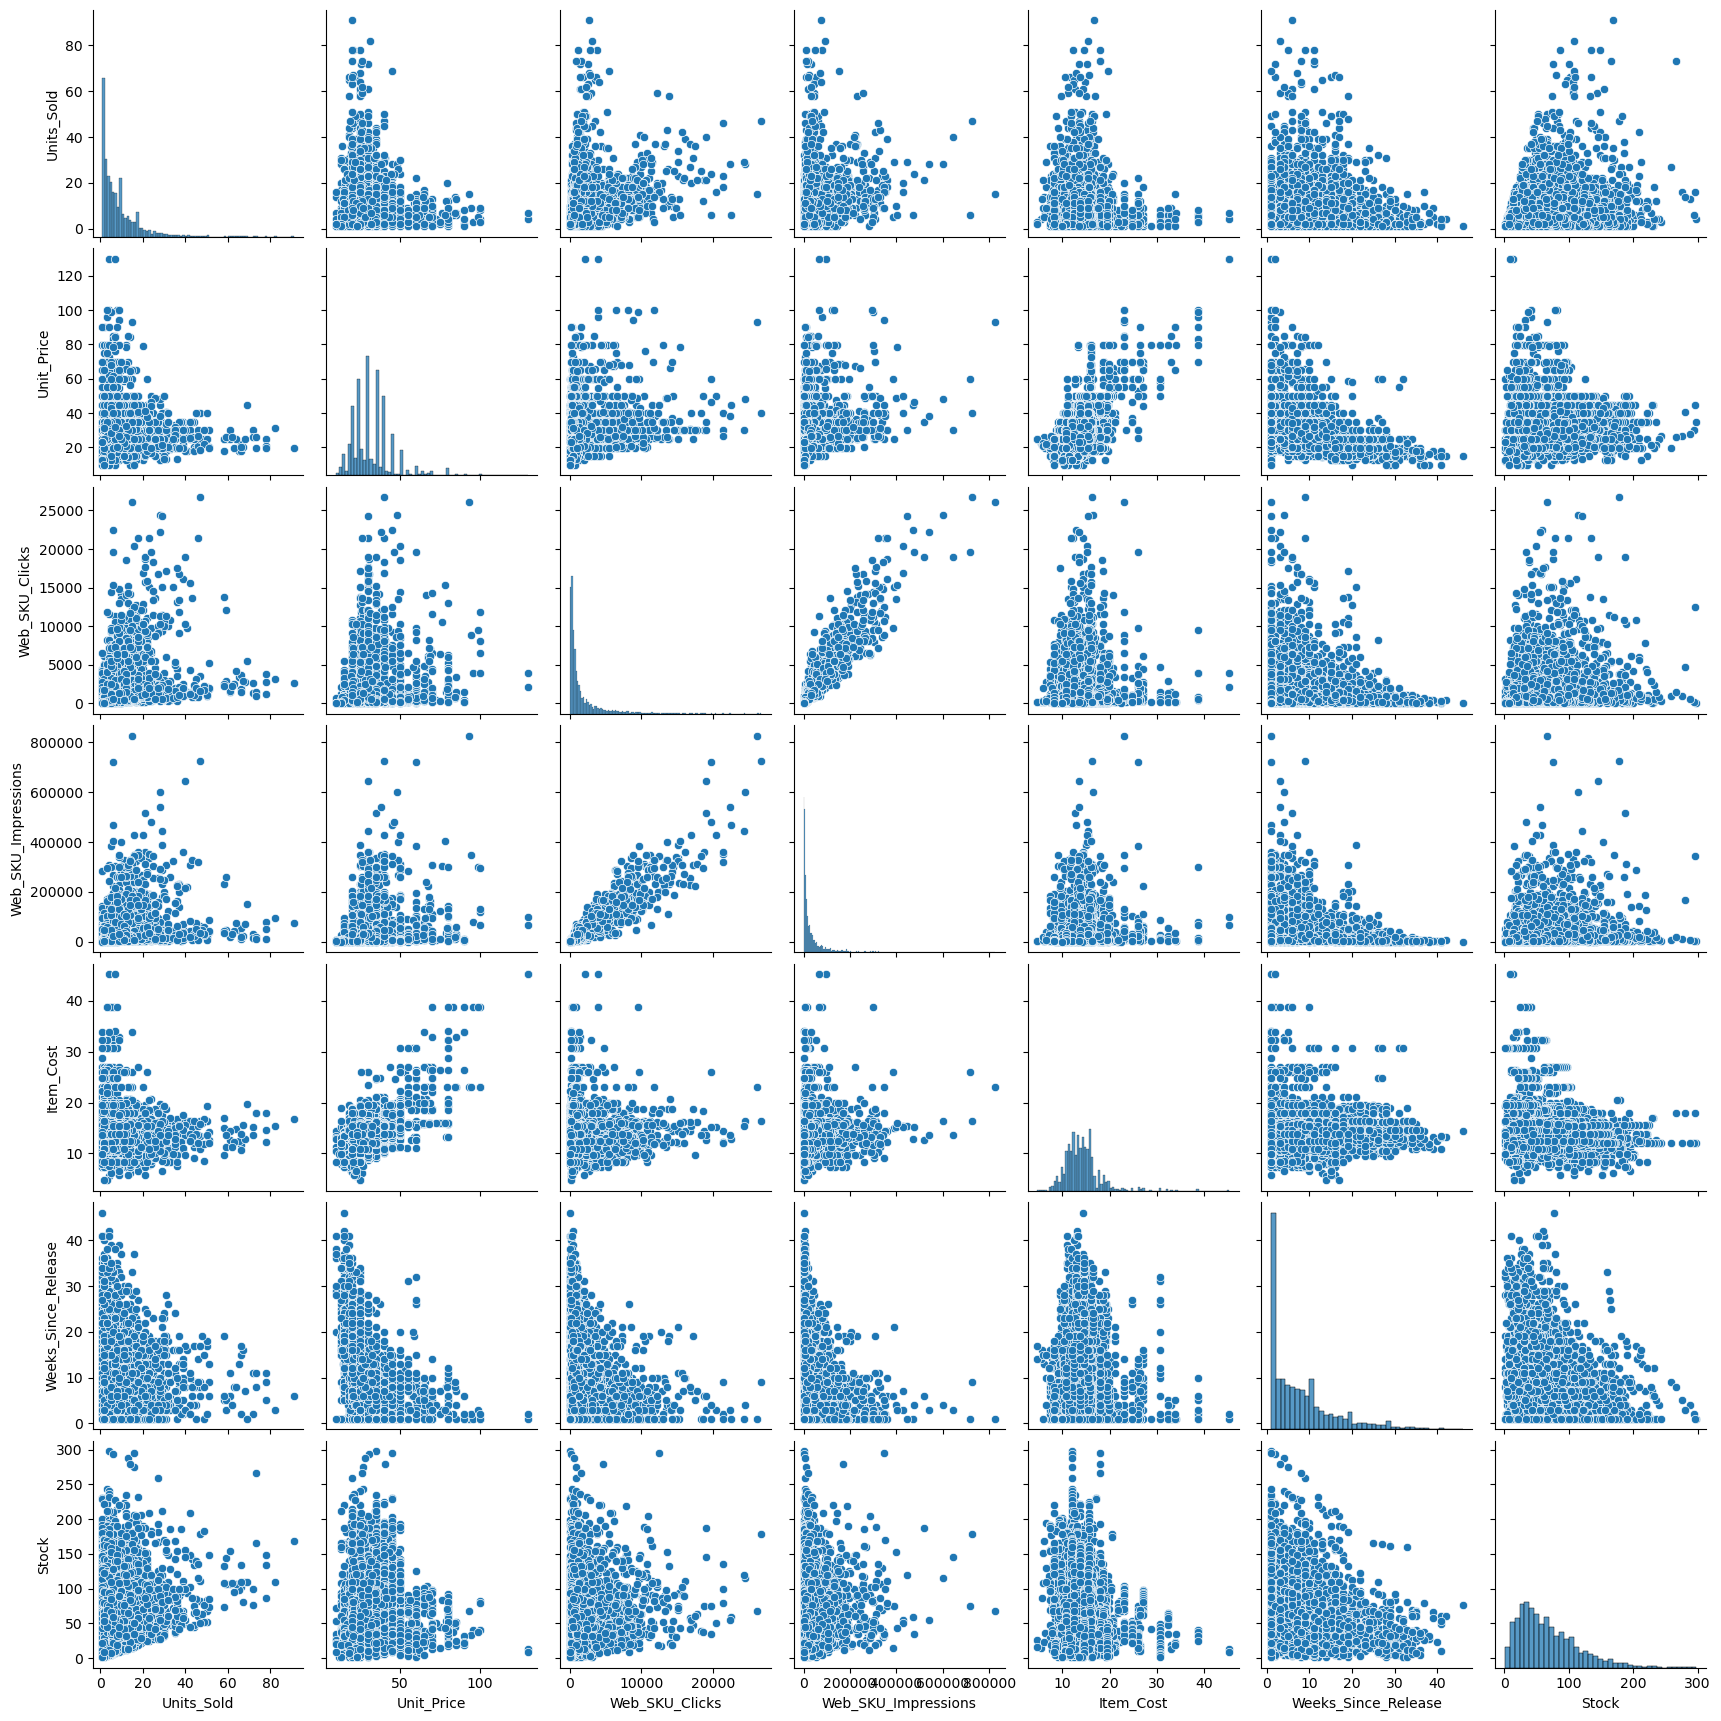

In [6]:
sns.pairplot(data_zalora)

In [7]:
data_zalora.corr()

C:\Users\nahar\AppData\Local\Temp\ipykernel_14572\4205731316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_zalora.corr()


,Units_Sold,Unit_Price,Web_SKU_Clicks,Web_SKU_Impressions,Item_Cost,Weeks_Since_Release,Stock
Units_Sold,1.000000,-0.171772,0.325265,0.280369,-0.077943,0.029730,0.186661
Unit_Price,-0.171772,1.000000,0.103388,0.143268,0.639991,-0.475646,0.001921
Web_SKU_Clicks,0.325265,0.103388,1.000000,0.932812,0.031988,-0.096429,0.068209
Web_SKU_Impressions,0.280369,0.143268,0.932812,1.000000,0.043073,-0.127920,0.079154
Item_Cost,-0.077943,0.639991,0.031988,0.043073,1.000000,-0.025066,-0.100863
Weeks_Since_Release,0.029730,-0.475646,-0.096429,-0.127920,-0.025066,1.000000,-0.233156
Stock,0.186661,0.001921,0.068209,0.079154,-0.100863,-0.233156,1.000000


## Modelling

- Here we use statsmodel to perform linear regression
- Predict unit sold based on price and other related variables

In [8]:
model = sm.ols("Units_Sold ~ Unit_Price + Weeks_Since_Release + Price_Band + Brand_Name + Week_of_Year", data = data_zalora)
result_ols = model.fit()

# Print model summary
print(result_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             Units_Sold   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     12.19
Date:                Thu, 13 Jul 2023   Prob (F-statistic):          3.21e-109
Time:                        14:52:15   Log-Likelihood:                -13758.
No. Observations:                3847   AIC:                         2.764e+04
Df Residuals:                    3783   BIC:                         2.804e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               14.6079 

### Load Product Data to Optimize The Price

In [9]:
data_SKU = pd.read_csv("data_sku.csv")
data_SKU.head()

,SKU,Color,Week_of_Year,Brand_Name,Units_Sold,Unit_Price,Web_SKU_Clicks,Web_SKU_Impressions,Item_Cost,Price_Band,Weeks_Since_Release,Stock
0,0D159AAFC1DF38GS,Red Gingham,36,ZALORA,4.0,44.9,300.0,4610.0,15.39,5,1,63.0
1,0D159AAFC1DF38GS,Red Gingham,37,ZALORA,8.0,34.9,740.0,12871.0,15.39,5,2,59.0
2,0D159AAFC1DF38GS,Red Gingham,38,ZALORA,12.0,34.9,462.0,3241.0,15.39,5,3,51.0
3,0D159AAFC1DF38GS,Red Gingham,39,ZALORA,NaN,0.0,NaN,NaN,15.39,5,4,39.0
4,0D159AAFC1DF38GS,Red Gingham,40,ZALORA,NaN,0.0,NaN,NaN,15.39,5,5,NaN


Understanding the data: check what the product in the data

In [10]:
data_SKU["SKU"].value_counts()

0D159AAFC1DF38GS    17
Name: SKU, dtype: int64

Check whether the product is in the previous data

In [11]:
data_zalora[data_zalora["SKU"] =="0D159AAFC1DF38GS"]

,SKU,Color,Week_of_Year,Brand_Name,Units_Sold,Unit_Price,Web_SKU_Clicks,Web_SKU_Impressions,Item_Cost,Price_Band,Weeks_Since_Release,Stock


It mean we will optimize pricing for new product 

We will demostrate two scenarios:
1. We set certain price (say latest price of the product)
2. Set certain price that maximized profift

Then we compare how their total predicted profit differed. Whether the price we have optimized truly have higher total predicted profit

## Scenario 1: Setting Price with Latest Price

- Get only the data that have no price, starting after week 3

In [12]:
data_SKU.head()

,SKU,Color,Week_of_Year,Brand_Name,Units_Sold,Unit_Price,Web_SKU_Clicks,Web_SKU_Impressions,Item_Cost,Price_Band,Weeks_Since_Release,Stock
0,0D159AAFC1DF38GS,Red Gingham,36,ZALORA,4.0,44.9,300.0,4610.0,15.39,5,1,63.0
1,0D159AAFC1DF38GS,Red Gingham,37,ZALORA,8.0,34.9,740.0,12871.0,15.39,5,2,59.0
2,0D159AAFC1DF38GS,Red Gingham,38,ZALORA,12.0,34.9,462.0,3241.0,15.39,5,3,51.0
3,0D159AAFC1DF38GS,Red Gingham,39,ZALORA,NaN,0.0,NaN,NaN,15.39,5,4,39.0
4,0D159AAFC1DF38GS,Red Gingham,40,ZALORA,NaN,0.0,NaN,NaN,15.39,5,5,NaN


In [13]:
# Filter data_SKU to keep data after week 3
data_SKU_afterweek3 = data_SKU[data_SKU['Weeks_Since_Release'] > 3].copy()

# Fill in unit price as 34.9 (latest price)
data_SKU_afterweek3['Unit_Price'] = 34.9

### Predict Weekly Sales

In [14]:
# Predict weekly sales using modeling that we have build before
predicted_unit_sales = result_ols.predict(data_SKU_afterweek3)
predicted_unit_sales

3     10.511512
4     11.173517
5     12.737860
6      8.783255
7      8.735420
8      8.120911
9      9.297959
10    16.093152
11     6.444685
12    14.891072
13     8.093968
14     5.422949
15    13.546487
16     4.225680
dtype: float64

Round the prediction result and store to new column called `predicted_sales`

In [15]:
predicted_weekly_sales = np.round(predicted_unit_sales, 0)
data_SKU_afterweek3['predicted_sales'] = predicted_weekly_sales

data_SKU_afterweek3

,SKU,Color,Week_of_Year,Brand_Name,Units_Sold,Unit_Price,Web_SKU_Clicks,Web_SKU_Impressions,Item_Cost,Price_Band,Weeks_Since_Release,Stock,predicted_sales
3,0D159AAFC1DF38GS,Red Gingham,39,ZALORA,NaN,34.9,NaN,NaN,15.39,5,4,39.0,11.0
4,0D159AAFC1DF38GS,Red Gingham,40,ZALORA,NaN,34.9,NaN,NaN,15.39,5,5,NaN,11.0
5,0D159AAFC1DF38GS,Red Gingham,41,ZALORA,NaN,34.9,NaN,NaN,15.39,5,6,NaN,13.0
6,0D159AAFC1DF38GS,Red Gingham,42,ZALORA,NaN,34.9,NaN,NaN,15.39,5,7,NaN,9.0
7,0D159AAFC1DF38GS,Red Gingham,43,ZALORA,NaN,34.9,NaN,NaN,15.39,5,8,NaN,9.0
8,0D159AAFC1DF38GS,Red Gingham,44,ZALORA,NaN,34.9,NaN,NaN,15.39,5,9,NaN,8.0
9,0D159AAFC1DF38GS,Red Gingham,45,ZALORA,NaN,34.9,NaN,NaN,15.39,5,10,NaN,9.0
10,0D159AAFC1DF38GS,Red Gingham,46,ZALORA,NaN,34.9,NaN,NaN,15.39,5,11,NaN,16.0
11,0D159AAFC1DF38GS,Red Gingham,47,ZALORA,NaN,34.9,NaN,NaN,15.39,5,12,NaN,6.0
12,0D159AAFC1DF38GS,Red Gingham,48,ZALORA,NaN,34.9,NaN,NaN,15.39,5,13,NaN,15.0


### Calculate Stock Based on Predicted Sales

In [16]:
init_stock = 39
init_sales = data_SKU_afterweek3["predicted_sales"].iloc[0]
init_sales

11.0

In [17]:
# Calculate cumulatice weekly sales
cumulative_sales = np.cumsum(data_SKU_afterweek3["predicted_sales"])
cumulative_sales

3      11.0
4      22.0
5      35.0
6      44.0
7      53.0
8      61.0
9      70.0
10     86.0
11     92.0
12    107.0
13    115.0
14    120.0
15    134.0
16    138.0
Name: predicted_sales, dtype: float64

In [18]:
# Calculate Stock
data_SKU_afterweek3['Stock'] = np.maximum((init_stock + init_sales - cumulative_sales), 0)
data_SKU_afterweek3[['Stock','predicted_sales']]

,Stock,predicted_sales
3,39.0,11.0
4,28.0,11.0
5,15.0,13.0
6,6.0,9.0
7,0.0,9.0
8,0.0,8.0
9,0.0,9.0
10,0.0,16.0
11,0.0,6.0
12,0.0,15.0


### Calculate Possible Sales Based on Stock

In [19]:
# Calculate possible sales based on stock
data_SKU_afterweek3["possible_sales"] = np.minimum(data_SKU_afterweek3['predicted_sales'], data_SKU_afterweek3['Stock'])

data_SKU_afterweek3[['Stock','predicted_sales','possible_sales']]

,Stock,predicted_sales,possible_sales
3,39.0,11.0,11.0
4,28.0,11.0,11.0
5,15.0,13.0,13.0
6,6.0,9.0,6.0
7,0.0,9.0,0.0
8,0.0,8.0,0.0
9,0.0,9.0,0.0
10,0.0,16.0,0.0
11,0.0,6.0,0.0
12,0.0,15.0,0.0


### Calculate Profit Based Possible Sales

In [20]:
# Calculate profit
data_SKU_afterweek3['Profit'] =  data_SKU_afterweek3["possible_sales"] * (data_SKU_afterweek3['Unit_Price'] - data_SKU_afterweek3['Item_Cost'])
data_SKU_afterweek3[['Week_of_Year','Unit_Price','Item_Cost','possible_sales','Profit']]

,Week_of_Year,Unit_Price,Item_Cost,possible_sales,Profit
3,39,34.9,15.39,11.0,214.61
4,40,34.9,15.39,11.0,214.61
5,41,34.9,15.39,13.0,253.63
6,42,34.9,15.39,6.0,117.06
7,43,34.9,15.39,0.0,0.00
8,44,34.9,15.39,0.0,0.00
9,45,34.9,15.39,0.0,0.00
10,46,34.9,15.39,0.0,0.00
11,47,34.9,15.39,0.0,0.00
12,48,34.9,15.39,0.0,0.00


In [21]:
data_SKU_afterweek3[['Week_of_Year','Unit_Price','possible_sales','Profit']]

,Week_of_Year,Unit_Price,possible_sales,Profit
3,39,34.9,11.0,214.61
4,40,34.9,11.0,214.61
5,41,34.9,13.0,253.63
6,42,34.9,6.0,117.06
7,43,34.9,0.0,0.00
8,44,34.9,0.0,0.00
9,45,34.9,0.0,0.00
10,46,34.9,0.0,0.00
11,47,34.9,0.0,0.00
12,48,34.9,0.0,0.00


In [22]:
# Calculate the total of Profit
profit_sum = np.sum(data_SKU_afterweek3['Profit'])
print(profit_sum)

799.9099999999999


From the above analyses, it appears that if Zalora continues to utilize a price of `$34.9`, by the conclusion of the seventh week, all items will have been purchased, resulting in a total profit of `$800`.

## Scenario 2: Setting Price that Maximize Profit

In [23]:
# Select relevant columns
data_SKU_afterweek3 = data_SKU_afterweek3[['Price_Band','Brand_Name','Week_of_Year','Weeks_Since_Release', 'Unit_Price','Item_Cost', 'Stock', 'Profit']].reset_index()
data_SKU_afterweek3

,index,Price_Band,Brand_Name,Week_of_Year,Weeks_Since_Release,Unit_Price,Item_Cost,Stock,Profit
0,3,5,ZALORA,39,4,34.9,15.39,39.0,214.61
1,4,5,ZALORA,40,5,34.9,15.39,28.0,214.61
2,5,5,ZALORA,41,6,34.9,15.39,15.0,253.63
3,6,5,ZALORA,42,7,34.9,15.39,6.0,117.06
4,7,5,ZALORA,43,8,34.9,15.39,0.0,0.00
5,8,5,ZALORA,44,9,34.9,15.39,0.0,0.00
6,9,5,ZALORA,45,10,34.9,15.39,0.0,0.00
7,10,5,ZALORA,46,11,34.9,15.39,0.0,0.00
8,11,5,ZALORA,47,12,34.9,15.39,0.0,0.00
9,12,5,ZALORA,48,13,34.9,15.39,0.0,0.00


In [24]:
def compute_profit(price, sales, cost):
    # Compute revenue
    revenue = sales * price

    # Compute profits
    profit = sales * (price - cost)

    # Return profit
    return profit

### Define Possible Range Price that We can Set

In [25]:
price = list(range(20, 60, 1))

### SImulating Calculate Profit Based on Several Prices in Each Week

In [26]:
# Placeholder for list profit based on several price in each week
data_profit = {}

data = data_SKU_afterweek3.copy()

In [27]:
# Iterating for each week
for i in range (len(data["Week_of_Year"].unique())):
    
    # Get data of certain week
    week = data['Week_of_Year'][i]
    data_SKU_week = data[data['Week_of_Year'] == week].copy()
    
    #Placeholder for price
    price_list = []

    # Placeholder for predicted qty sold
    quantity = []

    # Placeholder for profit
    profit = []
    
    # Placeholder for week
    week_list = []
    
    # Iterating for each possible price
    for p in price:
        
        # Assigning certain price in weekly data
        data_SKU_week['Unit_Price'] = p
        
        # Predict sales based on data in certain week
        sales = result_ols.predict(data_SKU_week)
        
        # Add price and sales in list
        price_list.append(p)
        quantity.append(sales.values[0])
        
        # Compute profit and save in list
        profit.append(compute_profit(p, sales, data['Item_Cost'][i]).values[0])
        
        week_list.append(week)
        
    # Insert price, qty, and profit in dictionary
    if f"{week}" not in data_profit:
        data_profit[f"{week}"] = {"price": price_list, "quantity": quantity, "profit": profit, "week": week_list}

#### Visualize Price that Maximize Profit in each week

In [28]:
all_week_data = pd.concat([pd.DataFrame(data_profit[f"{i}"]) for i in data['Week_of_Year']], axis = 0)
max_val = all_week_data.loc[(all_week_data['profit'] == all_week_data['profit'].max())]

In [29]:
all_week_data

,price,quantity,profit,week
0,20,16.656240,76.785267,39
1,21,16.243842,91.127955,39
2,22,15.831444,104.645847,39
3,23,15.419047,117.338944,39
4,24,15.006649,129.207245,39
...,...,...,...,...
35,55,-4.063517,-160.955919,52
36,56,-4.475915,-181.766914,52
37,57,-4.888313,-203.402705,52
38,58,-5.300711,-225.863292,52


<AxesSubplot:xlabel='price', ylabel='profit'>

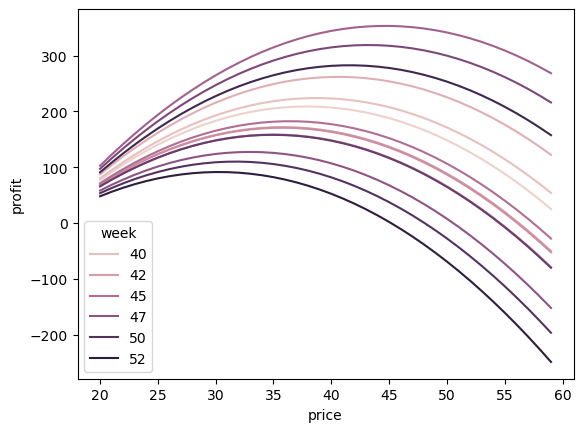

In [30]:
sns.lineplot(data = all_week_data, x = "price", y = "profit", hue ="week")

#### Get Only Optimized Price

For each week
- Get only price that have highest profit in each week
- Add price that maximize profit in new column `price_opt`

In [31]:
data["price_opt"] = [0 for i in range(len(data))]

# Iterating for each week
for i in range (len(data["Week_of_Year"].unique())):
    
    # Get data of certain week
    week = data['Week_of_Year'][i]
    
    # Convert dictionary to DataFrame for more convenience
    temp = pd.DataFrame(data_profit[f"{week}"])
    
    # Get price that have max profit
    price_that_max_profit = temp.loc[(temp['profit'] == temp['profit'].max())]["price"].values[0]
    
    # Insert to price_opt columns
    data.loc[data["Week_of_Year"] == week, "price_opt"] = price_that_max_profit

Here's our data look life, after knowing the price that maximize profit `price_opt`

In [32]:
data

,index,Price_Band,Brand_Name,Week_of_Year,Weeks_Since_Release,Unit_Price,Item_Cost,Stock,Profit,price_opt
0,3,5,ZALORA,39,4,34.9,15.39,39.0,214.61,38
1,4,5,ZALORA,40,5,34.9,15.39,28.0,214.61,39
2,5,5,ZALORA,41,6,34.9,15.39,15.0,253.63,41
3,6,5,ZALORA,42,7,34.9,15.39,6.0,117.06,36
4,7,5,ZALORA,43,8,34.9,15.39,0.0,0.00,36
5,8,5,ZALORA,44,9,34.9,15.39,0.0,0.00,35
6,9,5,ZALORA,45,10,34.9,15.39,0.0,0.00,36
7,10,5,ZALORA,46,11,34.9,15.39,0.0,0.00,45
8,11,5,ZALORA,47,12,34.9,15.39,0.0,0.00,33
9,12,5,ZALORA,48,13,34.9,15.39,0.0,0.00,43


### Calculate Profit Based Possible Sales

However, that's the suggested price based on predicted profit that we simulate, let's calculate predicted profit based on stock and possible sales

- We will use the model that we have build before to predict sales, based on price that we optimize
- Get only relevant variables, we separate the data to new DataFrame `predict`

In [33]:
var_in_model = ['Price_Band','Brand_Name','Week_of_Year','Weeks_Since_Release', 'Unit_Price', 'Stock', 'Profit']
predict = data[var_in_model].copy()
               
# Assign price that we optimized as unit price 
predict["Unit_Price"] = data["price_opt"]

#### Predict Sales using Model

In [34]:
# Predict weekly sales using model we have before
predicted_weekly_sales = result_ols.predict(predict)

# Round the predict results
predicted_weekly_sales = np.round(predicted_weekly_sales, 0)

In [35]:
# Fill in the predicted sales new column

predict['predicted_sales'] = predicted_weekly_sales

#### Calculate Stock

In [36]:
predict['Stock'] = np.maximum(39 + predicted_weekly_sales.iloc[0] - np.cumsum(predicted_weekly_sales), 0)
predict[['predicted_sales','Stock']]

,predicted_sales,Stock
0,9.0,39.0
1,9.0,30.0
2,10.0,20.0
3,8.0,12.0
4,8.0,4.0
5,8.0,0.0
6,9.0,0.0
7,12.0,0.0
8,7.0,0.0
9,12.0,0.0


#### Calculate Profit

In [37]:
predict['Profit'] = np.minimum(predicted_weekly_sales, predict['Stock']) * (predict['Unit_Price'] - 15.39)
predict[['predicted_sales','Stock','Profit']]

,predicted_sales,Stock,Profit
0,9.0,39.0,203.49
1,9.0,30.0,212.49
2,10.0,20.0,256.10
3,8.0,12.0,164.88
4,8.0,4.0,82.44
5,8.0,0.0,0.00
6,9.0,0.0,0.00
7,12.0,0.0,0.00
8,7.0,0.0,0.00
9,12.0,0.0,0.00


In [38]:
# Compute the total profits from data-driven pricing
profit_sum = np.sum(predict['Profit'])
print(profit_sum)

919.4000000000001


Based on the previous analysis, it appears that if Zalora adopts a pricing strategy focused on maximizing profits, all products will be sold out by the conclusion of week 7, resulting in a total profit of $919. 

We notice a $119 increase in profits following the implementation of linear regression models and analytics-driven pricing.